# Data Visualization

## References
* https://stackoverflow.com/questions/47343838/how-to-change-column-names-in-pandas-dataframe-using-a-list-of-names
* https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
* https://stackoverflow.com/questions/6557553/get-month-name-from-number
* https://stackoverflow.com/questions/19626530/python-xticks-in-subplots
* https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py
* https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
* https://stackoverflow.com/questions/9397944/how-to-set-the-default-color-cycle-for-all-subplots-with-matplotlib

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import datetime as dt
import calendar

In [2]:
# Choose colors
cmap = plt.get_cmap("tab20b")

# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cmap(np.array([1, 5, 9, 13, 17]))) 

In [3]:
# Import dataset
wardrobe_df = pd.read_csv('wardrobedata.csv')
wardrobe_df.head()

,Item,Total Wears,Cost per Wear,Wears per Month,Date Acquired,Cost,Source,Repairs/Tailoring,Color,Type,...,Wears (10/2019),Wears (9/2019),Wears (8/2019),Wears (7/2019),Wears (6/2019),Wears (5/2019),Wears (4/2019),Wears (3/2019),Wears (2/2019),Wears (1/2019)
0,Brian's White Buttonup LS Shirt,5.0,0.000000,1.578947,2020-08-09,0,Secondhand,0.0,cream/white/tan,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cream Turtleneck LS Shirt,12.0,0.333333,0.518732,2018-12-19,4,Secondhand,0.0,cream/white/tan,Tops,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Tie Dye Mineo LS Shirt,5.0,7.000000,0.553506,2020-02-15,35,Fast Fashion,0.0,multi,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Forest Green Silk LS Shirt,10.0,2.300000,0.767263,2019-10-18,23,Secondhand,0.0,green,Tops,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Grey Heather LS Shirt,23.0,0.652174,0.659656,2018-01-01,15,Fast Fashion,0.0,grey,Tops,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0


## Acquisition Types

In [4]:
# Fix discrepances in source labels
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Second one purchased 9/4/19', 'Secondhand')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Second', 'Secondhand')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Slow fashion', 'Slow Fashion')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Fair Trade', 'Slow Fashion')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('New', 'Fast Fashion')

# Aggregate by source
source_count = wardrobe_df[['Source', 'Item']].groupby('Source').count()
source_count

,Item
Source,
Fast Fashion,52
Gift,10
Hand-me-down,10
Secondhand,32
Slow Fashion,25


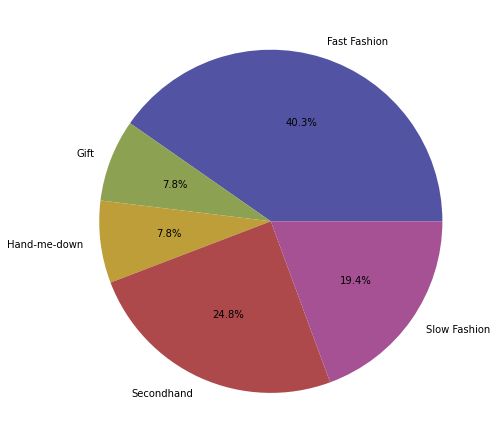

In [5]:
# Plot all items by source
source_count.plot(kind='pie', y='Item', legend=None, figsize=(7,7), autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()
plt.show()

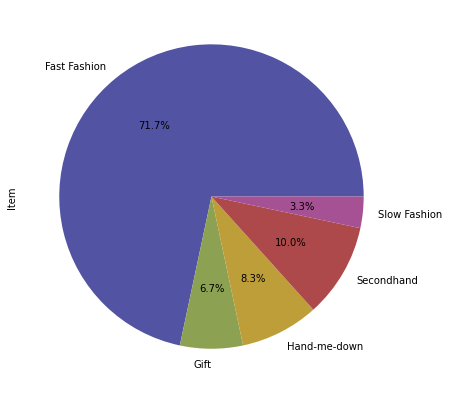

In [6]:
# Plot only items acquired before 2019
previous_source = wardrobe_df.loc[wardrobe_df['Date Acquired'] < '2019-01-01']
previous_type = previous_source[['Source', 'Item']].groupby('Source').count()
previous_type.plot(kind='pie', y='Item', legend=None, figsize=(7,7), autopct='%1.1f%%')
plt.show()

### Nested Pie Chart

In [7]:
# Limit types of sources for clearer visualization and pull out list of sources
sources_df = wardrobe_df.copy()
ethical_sources = ['Secondhand', 'Hand-me-down']
for ethical in ethical_sources:
    sources_df['Source'] = sources_df['Source'].replace(ethical, 'Slow Fashion')
sources = sources_df['Source'].unique()
sources

array(['Slow Fashion', 'Fast Fashion', 'Gift'], dtype=object)

In [8]:
# Create list of lists by source type which include count of items pre-2019 and 2019/later
source_sums = []
for source in sources:
    # Count number of items by source before 2019
    b_source = sources_df.loc[(sources_df['Date Acquired'] < '2019-01-01') & (sources_df['Source'] == source)]
    b_num_source = b_source['Source'].count()
    # Count number of items by source for 2019 and later
    t_source = sources_df.loc[(sources_df['Date Acquired'] >= '2019-01-01') & (sources_df['Source'] == source)]
    t_num_source = t_source['Source'].count()
    
    source_sums.append([b_num_source, t_num_source])
    print(f'{source} \nBefore 2019: {b_num_source} \n2019 and Later: {t_num_source}\n')

Slow Fashion 
Before 2019: 13 
2019 and Later: 54

Fast Fashion 
Before 2019: 43 
2019 and Later: 9

Gift 
Before 2019: 4 
2019 and Later: 6



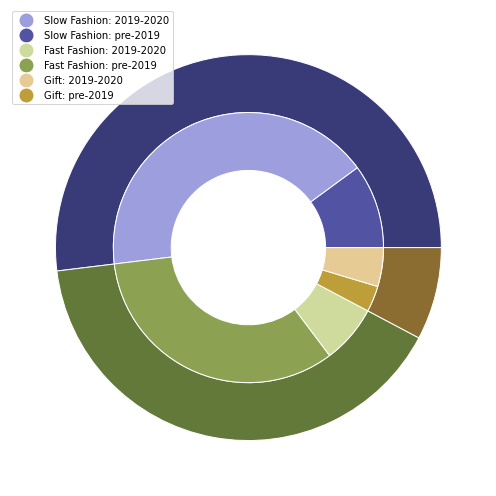

In [9]:
# Create figure
fig, ax = plt.subplots(figsize=(7,7))

# Size of donuts
size = 0.3

# Data related to source/date
vals = np.array(source_sums)

# Set custom colors
cmap = plt.get_cmap("tab20b")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 3, 5, 7, 9, 11]))

# Plot outer donut
ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# Plot inner donut
ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
ax.set(aspect="equal")


# Create the custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'{sources[0]}: 2019-2020', 
                          markerfacecolor=cmap(3), markersize=15),
                   Line2D([0], [0], marker='o', color='w', label=f'{sources[0]}: pre-2019', 
                          markerfacecolor=cmap(1), markersize=15),
                  Line2D([0], [0], marker='o', color='w', label=f'{sources[1]}: 2019-2020', 
                          markerfacecolor=cmap(7), markersize=15),
                  Line2D([0], [0], marker='o', color='w', label=f'{sources[1]}: pre-2019', 
                          markerfacecolor=cmap(5), markersize=15),
                  Line2D([0], [0], marker='o', color='w', label=f'{sources[2]}: 2019-2020', 
                          markerfacecolor=cmap(11), markersize=15),
                  Line2D([0], [0], marker='o', color='w', label=f'{sources[2]}: pre-2019', 
                          markerfacecolor=cmap(9), markersize=15)]
ax.legend(handles=legend_elements, loc='upper left')

# Finalize plot format and save
plt.tight_layout()
plt.savefig('../Assets/Images/acquisitiontypes.png')
plt.show()

## Average Cost per Wear by Category

In [10]:
# Dataframe with only types/categories
type_cat = wardrobe_df[['Type', 'Category']]

In [11]:
# Determine average cost per wear by category
cpw_category = wardrobe_df[['Category', 'Cost per Wear']].groupby('Category').mean().reset_index()

# Add types to dataframe for sorting
cpw_cat_type = cpw_category.merge(type_cat, how='left', on='Category').drop_duplicates()
cpw_cat_type

,Category,Cost per Wear,Type
0,blazer,6.473333,Outerwear
5,boots,12.017881,Shoes
12,cardigan,4.658929,Outerwear
15,coat/jacket,4.074284,Outerwear
23,flats,13.995671,Shoes
26,heels,7.500000,Shoes
29,jeans,1.839804,Bottoms
39,leggings,4.805836,Bottoms
45,pants,7.171043,Bottoms
55,sandals,6.236392,Shoes


In [12]:
# Pull out types included in dataset
cpw_types = cpw_cat_type['Type'].unique()
cpw_types

array(['Outerwear', 'Shoes', 'Bottoms', 'Tops'], dtype=object)

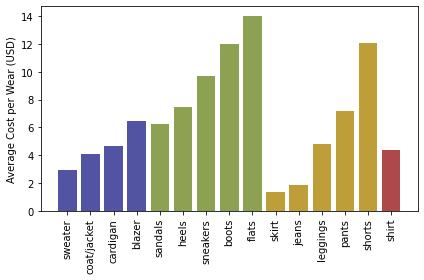

In [13]:
# Generate bars grouped by type
for type in cpw_types:
    df = cpw_cat_type.loc[cpw_cat_type['Type']== type].sort_values('Cost per Wear')
    plt.bar(df['Category'], df['Cost per Wear'], label=type)

# Format plot
plt.xticks(rotation='vertical')
plt.ylabel('Average Cost per Wear (USD)')
plt.tight_layout()
plt.savefig('../Assets/Images/cpwbar.png')
plt.show()

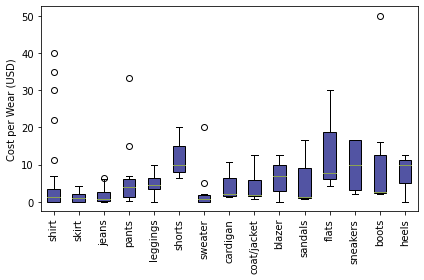

In [14]:
# Same data but in a boxplot
types = wardrobe_df['Category'].unique()
plt.boxplot([wardrobe_df['Cost per Wear'].loc[wardrobe_df['Category'] == cat] for cat in types], patch_artist=True)
plt.xticks(range(1, (len(types) + 1)), types, rotation='vertical')
plt.ylabel('Cost per Wear (USD)')
plt.tight_layout()
plt.savefig('../Assets/Images/cpwcatbox.png')
plt.show()

## Average Wears per Month by Category

In [15]:
# Calculate average wears per month by category
wpm_category = wardrobe_df[['Category', 'Wears per Month']].groupby('Category').mean().reset_index()

# Add types to dataframe
wpm_cat_type = wpm_category.merge(type_cat, how='left', on='Category').drop_duplicates()
wpm_cat_type

,Category,Wears per Month,Type
0,blazer,0.591381,Outerwear
5,boots,1.585395,Shoes
12,cardigan,1.914921,Outerwear
15,coat/jacket,1.254364,Outerwear
23,flats,1.534984,Shoes
26,heels,0.075589,Shoes
29,jeans,2.046386,Bottoms
39,leggings,0.519685,Bottoms
45,pants,1.755304,Bottoms
55,sandals,1.152962,Shoes


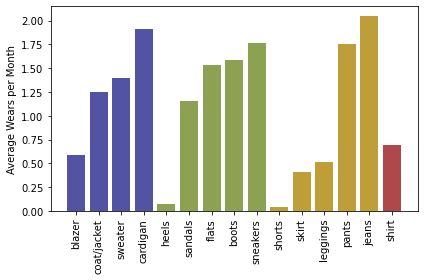

In [16]:
# Determine types in dataset
wpm_types = wpm_cat_type['Type'].unique()

# Generate bars grouped by type
for type in wpm_types:
    df = wpm_cat_type.loc[wpm_cat_type['Type']== type].sort_values('Wears per Month')
    plt.bar(df['Category'], df['Wears per Month'], label=type)

# Format plot
plt.xticks(rotation='vertical')
plt.ylabel('Average Wears per Month')
plt.tight_layout()
plt.savefig('../Assets/Images/wpmbar.png')
plt.show()

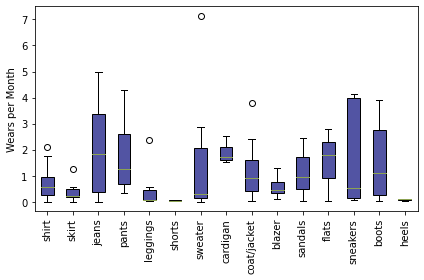

In [17]:
# Same data but in a boxplot
plt.boxplot([wardrobe_df['Wears per Month'].loc[wardrobe_df['Category'] == cat] for cat in types], patch_artist=True)
plt.xticks(range(1, (len(types) + 1)), types, rotation='vertical')
plt.ylabel('Wears per Month')
plt.tight_layout()
plt.savefig('../Assets/Images/wpmcatbox.png')
plt.show()

## Average Wears per Month by Category (line graphs)

In [18]:
# Edit column names so that they are dates only 

# Determine columns that include wear counts
wear_cols = []
for col_name in wardrobe_df.columns:
    if 'Wears (' in col_name:
        wear_cols.append(col_name)

# Pull out columns of interest
month_df = wardrobe_df[['Type', 'Category', 'Subcategory - Sleeves', *wear_cols]]

# Pull dates from column names
date_cols = []
for col_name in wear_cols:
    name_1 = col_name.replace('Wears (', '')
    name_2 = name_1.replace(')', '')
    date_cols.append(name_2)

# Replace names in dataframe
month_df = month_df.rename(columns=dict(zip(wear_cols, date_cols)))
month_df.head()

,Type,Category,Subcategory - Sleeves,10/2020,9/2020,8/2020,7/2020,6/2020,5/2020,4/2020,...,10/2019,9/2019,8/2019,7/2019,6/2019,5/2019,4/2019,3/2019,2/2019,1/2019
0,Tops,shirt,long sleeve,2.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tops,shirt,long sleeve,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Tops,shirt,long sleeve,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tops,shirt,long sleeve,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tops,shirt,long sleeve,1.0,0.0,1.0,1.0,0.0,2.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0


In [19]:
# Determine total number of wears of each type of top in dataset
tops = month_df.loc[month_df['Type']=='Tops'].groupby(['Subcategory - Sleeves']).sum()
tops = tops.transpose()

# Determine average wears per calendar month
tops.index = pd.to_datetime(tops.index,format='%m/%Y')
tops_months = tops.groupby(by=tops.index.month).mean()

# Create list of tops categories
tops_list = tops_months.columns.tolist()

tops_months

Subcategory - Sleeves,long sleeve,mid sleeve,short sleeve,sleeveless
1,10.5,6.5,6.5,6.0
2,11.5,3.5,6.0,4.5
3,4.5,5.0,4.5,7.0
4,6.0,2.5,1.0,6.0
5,3.0,2.0,7.0,8.0
6,2.0,3.0,7.0,4.5
7,0.5,3.0,11.0,5.0
8,4.5,3.0,6.0,6.0
9,6.0,4.0,6.0,8.0
10,10.0,3.5,4.5,12.0


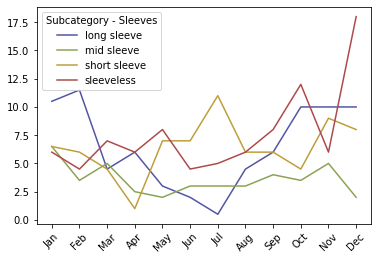

In [20]:
# Plot this on a line graph 
tops_index = tops_months.index
months_list = tops_index.tolist()

tops_months.plot(kind='line', rot=45)
plt.xticks(months_list, [calendar.month_abbr[m] for m in months_list])
plt.show()

In [21]:
# Determine total number of wears of each type of bottom in dataset
bottoms = month_df.loc[month_df['Type']=='Bottoms'].groupby(['Category']).sum()
bottoms = bottoms.transpose()

# Determine average wears per calendar month
bottoms.index = pd.to_datetime(bottoms.index,format='%m/%Y')
bottoms_months = bottoms.groupby(by=bottoms.index.month).mean()

# Create list of bottoms categories
bottoms_list = bottoms_months.columns.tolist()

bottoms_months

Category,jeans,leggings,pants,shorts,skirt
1,20.0,6.0,7.5,0.0,1.5
2,23.0,5.5,3.5,0.0,1.0
3,18.5,1.0,3.5,0.0,3.5
4,9.0,7.0,2.5,0.0,2.0
5,9.5,2.0,8.5,1.5,2.5
6,11.0,0.5,4.0,0.0,1.0
7,8.0,0.5,5.0,0.0,5.0
8,9.5,1.0,10.5,1.5,3.5
9,9.0,3.0,9.5,0.0,4.5
10,19.0,3.5,6.0,0.0,2.0


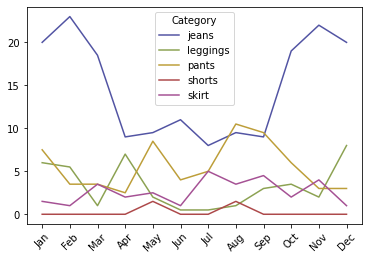

In [22]:
# Plot this on a line graph 
bottoms_index = bottoms_months.index
months_list = bottoms_index.tolist()

bottoms_months.plot(kind='line', rot=45)
plt.xticks(months_list, [calendar.month_abbr[m] for m in months_list])
plt.show()

In [23]:
# Determine total number of wears of each type of outerwear in dataset
outerwear = month_df.loc[month_df['Type']=='Outerwear'].groupby(['Category']).sum()
outerwear = outerwear.transpose()

# Determine average wears per calendar month
outerwear.index = pd.to_datetime(outerwear.index,format='%m/%Y')
outerwear_months = outerwear.groupby(by=outerwear.index.month).mean()

# Create list of outerwear categories
outerwear_list = outerwear_months.columns.tolist()

outerwear_months

Category,blazer,cardigan,coat/jacket,sweater
1,3.0,4.0,25.5,10.0
2,2.5,4.0,24.0,7.0
3,0.5,2.5,16.0,11.0
4,2.0,1.0,1.5,4.5
5,0.5,1.5,1.0,2.0
6,0.0,0.5,1.0,0.5
7,0.5,1.0,0.0,1.0
8,1.0,1.0,0.0,1.0
9,0.0,2.0,3.0,6.0
10,1.0,1.5,4.0,14.5


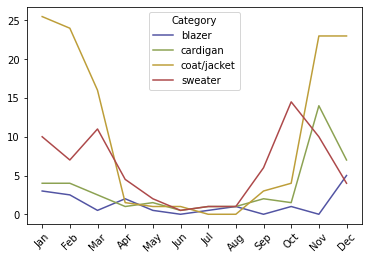

In [24]:
# Plot this on a line graph 
outerwear_index = outerwear_months.index
months_list = outerwear_index.tolist()

outerwear_months.plot(kind='line', rot=45)
plt.xticks(months_list, [calendar.month_abbr[m] for m in months_list])
plt.show()

In [25]:
# Determine total number of wears of each type of shoes in dataset
shoes = month_df.loc[month_df['Type']=='Shoes'].groupby(['Category']).sum()
shoes = shoes.transpose()

# Determine average wears per calendar month
shoes.index = pd.to_datetime(shoes.index,format='%m/%Y')
shoes_months = shoes.groupby(by=shoes.index.month).mean()

# Create list of shoes categories
shoes_list = shoes_months.columns.tolist()

shoes_months

Category,boots,flats,heels,sandals,sneakers
1,30.0,0.0,0.0,1.0,4.0
2,24.5,0.0,0.5,2.5,3.5
3,9.5,4.5,0.0,1.5,5.0
4,3.5,3.0,1.0,5.5,2.0
5,0.5,3.5,2.0,8.0,6.5
6,0.5,1.5,0.5,6.0,2.0
7,0.0,2.0,0.0,7.5,4.5
8,6.0,3.0,0.0,6.5,3.5
9,8.5,1.0,1.0,5.0,2.5
10,16.5,0.0,0.0,2.0,6.5


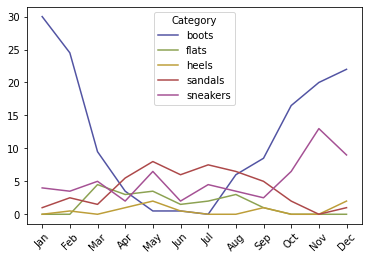

In [26]:
# Plot this on a line graph 
shoes_index = shoes_months.index
months_list = shoes_index.tolist()

shoes_months.plot(kind='line', rot=45)
plt.xticks(months_list, [calendar.month_abbr[m] for m in months_list])
plt.show()

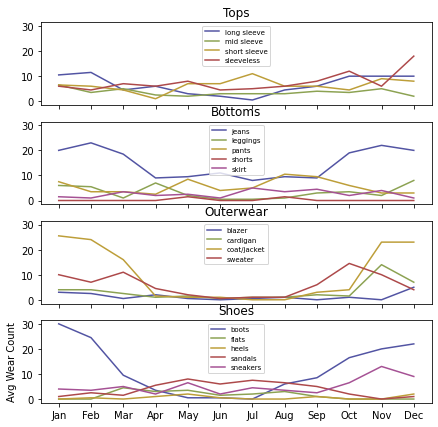

In [27]:
# Put all four line graphs together using plt.subplot
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, sharex= True, sharey=True, figsize=(7,7))

# Plot 1: tops and axes labels
for t in tops_list:
    ax1.plot(tops_index, tops_months[t], label=t)
ax1.set_xticks(months_list)
ax1.set_xticklabels([calendar.month_abbr[m] for m in months_list])
ax1.set_title('Tops')
ax1.legend(loc='upper center', prop={'size': 7})
plt.ylabel('Avg Wear Count')

# Plot 2: bottoms
for b in bottoms_list:
    ax2.plot(bottoms_index, bottoms_months[b], label=b)

ax2.set_title('Bottoms')
ax2.legend(loc='upper center', prop={'size': 7})

# Plot 3: outerwear
for o in outerwear_list:
    ax3.plot(outerwear_index, outerwear_months[o], label=o)
ax3.set_title('Outerwear')
ax3.legend(loc='upper center', prop={'size': 7})

# Plot 4: shoes
for s in shoes_list:
    ax4.plot(shoes_index, shoes_months[s], label=s)
ax4.set_title('Shoes')
ax4.legend(loc='upper center', prop={'size': 7})

plt.tight_layout
plt.savefig('../Assets/Images/wpmmonthline.png')
plt.show()